# Exercise

Select a regression dataset you used in a previous course and train an MLP to fit the data. Create a table comparing the results obtained in the previous course with those obtained using the MLP. A portion of the score is dedicated to achieving better performance with the MLP compared to the results from the previous course.

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset

import numpy as np
import random
np.random.seed(0)
torch.manual_seed(0)
random.seed(0)

In [2]:
df = pd.read_csv("Salary_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [7]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

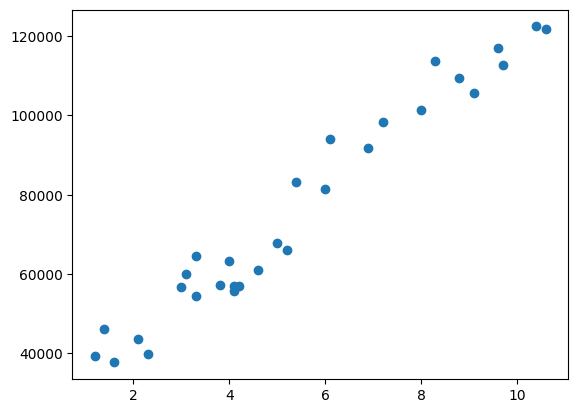

In [8]:
plt.scatter(df['YearsExperience'], df['Salary'])

In [81]:
class Regression_Model(nn.Module):
  def __init__(self , input_shape , output_shape):
    super().__init__()
    self.fc1 = nn.Linear(input_shape , 128)
    self.fc2 = nn.Linear(128 , 32)
    self.fc3 = nn.Linear(32 , 8)
    self.out = nn.Linear(8 , output_shape)

    self.relu = nn.ReLU()

  def forward(self , x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.relu(self.fc3(x))
    x = self.out(x)
    return x

In [86]:
from sklearn.preprocessing import StandardScaler

X = df['YearsExperience'].values.reshape(-1, 1)
Y = df['Salary'].values.reshape(-1, 1)

scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_scaled = scaler_X.fit_transform(X).astype(np.float32)
Y_scaled = scaler_Y.fit_transform(Y).astype(np.float32)

In [87]:
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(Y_scaled, dtype=torch.float32).view(-1, 1)

In [91]:
model = Regression_Model(1 , 1)

In [92]:
loss_fn = nn.MSELoss()

In [93]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [98]:
def train_one_epoch(model, optimizer, X, Y, BS=100):
    indexes = np.random.permutation(len(X))
    losses = []

    for i, batch_start in enumerate(range(0, len(X), BS)):
        optimizer.zero_grad()

        x = X[indexes[batch_start:batch_start+BS]]
        y = Y[indexes[batch_start:batch_start+BS]]

        y_preds = model(x)

        loss = loss_fn(y_preds, y)
        loss.backward()

        optimizer.step()

        losses.append(loss.item())
    return losses

In [100]:
losses = []

pbar = tqdm(range(1000))
for ep in pbar:
    epoch_loss = train_one_epoch(model, optimizer, X_tensor, y_tensor)
    losses.extend(epoch_loss)

    if (ep + 1) % 100 == 0:
        pbar.set_description(f"loss={losses[-1]:0.03f}")

loss=0.015: 100%|██████████| 1000/1000 [00:01<00:00, 642.52it/s]


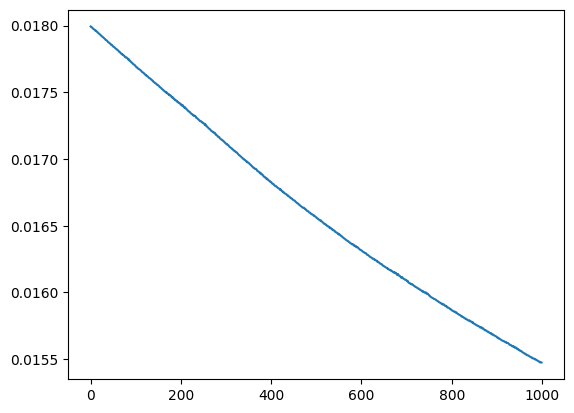

In [105]:
plt.plot(losses)
